#Introducción

## Ecuación que describe el movimiento de un Pendulo

Al analizar el movimiento de un péndulo simple (oscilante) con la ecuación de la Segunda Ley de Newton, se obtiene una Ecuación Diferencial Ordinaria de segundo orden que describe su movimiento en el tiempo, y es la siguiente: <br><br>
$$\frac{d^2}{dt^2}\theta + w^2 sin\theta=0 \hspace{4em} Eq(1)$$ <br>
Donde:<br>
$ w^2 = \frac{g}{l} \qquad g:$ constante gravitacional $\qquad l:$ longitud de cuerda <br><br>
Está ecuación describe el movimiento del péndulo en función de su ángulo de desplazamiento respecto al punto de anclaje.La ecuación $(i)$ es una no tiene solución analítica, por lo que es necesario resolver con algún método numérico.<br>
Sin embargo, para estudiar el movimiento del péndulo con ángulos iniciales pequeños, se suele utilizar las siguientes aproximaciones:<br><br>
$$\frac{d^2}{dt^2}\theta + w^2 \theta - \frac{w^2}{6}\theta^3 = 0 \hspace{4em} Eq(2)$$<br>
$$\frac{d^2}{dt^2}\theta + w^2 \theta = 0 \hspace{4em} Eq(3)$$<br>
Las cuales son precisas para ángulos pequeños. Sin embargo, conforma crece el ángulo pierden su precisión, y para esos casos es necesario hacer uso de algún método numérico. Para este caso, haremos uso del método de Euler y el de Runge-Kutta de orden 4 en las 3 ecuaciones, y así poder comparar los resultados. Sin embargo estos métodos sirven para soluciones de Ecuaciones Diferenciales Ordindarias de la forma:<br><br>
$$\frac{d}{dt}y = f( t, y)$$<br><br>
Para resolver está situación se hace un cambio de variable de tal forma que la Ecuación Diferencial Ordinaria quede en primer orden, y se pueda resolver gracias a un sistema de ecuaciones. (Se muestra en los procedimientos para cada una de las ecuaciones). <br><br>


**Método de Runge-Kutta de orden 4**<br>
$$y_{i+1} = y_i + \phi(t_i,y_i,h) h$$<br>
$$\phi = a_1k_1 + a_2k_2 + · · · + a_nk_n$$<br><br>
Se acorta a $n=4$, obteniendo:<br><br>
$$y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)h$$<br><br>
Donde: <br>
$$k_1 = f(t_i,y_i)$$<br>
$$k_2 = f(t_i + \frac{1}{2}h,\ y_i + \frac{1}{2}k_1h)$$<br>
$$k_3 = f(t_i + \frac{1}{2}h,\ y_i + \frac{1}{2}k_2h)$$<br>
$$k_4 = f(t_i + h,\ y_i + k_3h)$$


##Ecuación 1

Ecuación original<br>
$$\frac{d^2}{dt^2}\theta + w^2 sin\theta=0 \hspace{4em} (i)$$ <br>
"Conversión" a EDO de primer orden. Cambio de variable $u$: <br><br>
$$u = \frac{d}{dt}\theta \hspace{4em} (ii)$$<br>
La derivada de $u$ es igual a la derivada de 2do orden de $\theta$:<br><br>
$$\frac{d}{dt}u = \frac{d^2}{dt^2}\theta \hspace{4em} (iii)$$<br>
Sustituimos la ecuación $(iii)$ en la EDO de segundo orden de la ecuación $(i)$:<br><br>
$$\frac{d}{dt}u + w^2 sin\theta = 0 \hspace{4em} (iv)$$<br>
Y obtenemos un sistema de EDO's de primer orden:<br><br>
$$\frac{d}{dt}u = -w^2 sin\theta \hspace{4em} (v)$$<br>
$$\frac{d}{dt}\theta=u \hspace{4em} (ii)$$<br>
Este sistema esta conformado por EDO de primer orden que, en principio, se pueden resolver con los métodos de Euler y de Runge-Kutta(4).

## Ecuación 2

Ecuación de aproximación (2)<br><br>
$$\frac{d^2}{dt^2}\theta + w^2 \theta - \frac{w^2}{6}\theta^3 = 0 \hspace{4em} (vi)$$<br>
Retomamos el cambio de variable de la ecuación $(ii)$. Sustituimos $u'$ de $(iii)$ en la EDO de segundo orden $(vi)$:<br><br>
$$\frac{d}{dt}u + w^2 \theta - \frac{w^2}{6}\theta^3 = 0 \hspace{4em} (vii)$$<br>
Y obtenemos un sistema de EDO's de primer orden:<br><br>
$$\frac{d}{dt}u = -w^2 \theta + \frac{w^2}{6}\theta^3\hspace{4em} (viii)$$<br>
$$\frac{d}{dt}\theta=u \hspace{4em} (ii)$$<br>
Este sistema esta conformado por EDO de primer orden que, en principio, se pueden resolver con los métodos de Euler y de Runge-Kutta(4).

## Ecuación 3

Ecuación de aproximación (3)<br><br>
$$\frac{d^2}{dt^2}\theta + w^2 \theta = 0 \hspace{4em} (ix)$$<br>
Retomamos el cambio de variable de la ecuación $(ii)$. Sustituimos $u'$ de $(iii)$ en la EDO de segundo orden $(ix)$:<br><br>
$$\frac{d}{dt}u + w^2 \theta = 0 \hspace{4em} (x)$$<br>
Y obtenemos un sistema de EDO's de primer orden:<br><br>
$$\frac{d}{dt}u = -w^2 \theta \hspace{4em} (xi)$$<br>
$$\frac{d}{dt}\theta=u \hspace{4em} (ii)$$<br>
Este sistema esta conformado por EDO de primer orden que, en principio, se pueden resolver con los métodos de Euler y de Runge-Kutta(4).

#Código de solución numérica

In [ ]:
#Importación de bibliotecas a utilizar
import numpy as np
import math
import matplotlib.pyplot as plt

##Método Runge-Kutta (4)
Recibe: <br>
$a \leq t \leq b :$ límites de integración <br>
$h:$ tamaño de paso<br>
$f_i:$ función a evaular<br>
$alpha_i:$ condición inicial de la función $f_i$<br>


In [ ]:
#Definición del método numérico Runge-Kutta de orden 4 para la EDO de 2do orden
def RK4(a,b,h,alpha1,alpha2,f1,f2):
  out = []              #Crea una variable para recibir los valores de salida
  N = int((b-a)/h)      #Calcula el número de iteraciones a realizar
  t = a                 #Asigna el valor inicial de t
  w = alpha1            #Asigna el valor inicial de la variable que buscamos solución numérica
  z = alpha2            #Asigna el valor inicial de la primer derivada
  out.append([t,w,z])   #Los primeros valores numéricos son los parámetros iniciales

  #Inicia el ciclo
  for i in range(0, N):
    kf1_1 = h * f2(out[i][0], out[i][1], out[i][2])   # K1 para la función 1
    kf2_1 = h * f1(out[i][0], out[i][1], out[i][2])   # K1 para la función 2

    kf1_2 = h * f2(out[i][0] + h/2, out[i][1] + kf1_1/2, out[i][2] + kf2_1)   # K2 para la función 1
    kf2_2 = h * f1(out[i][0] + h/2, out[i][1] + kf1_1/2, out[i][2] + kf2_1)   # K2 para la función 2

    kf1_3 = h * f2(out[i][0] + h/2, out[i][1] + kf1_2/2, out[i][2] + kf2_2)   # K3 para la función 1
    kf2_3 = h * f1(out[i][0] + h/2, out[i][1] + kf1_2/2, out[i][2] + kf2_2)   # K3 para la función 2

    kf1_4 = h * f2(out[i][0] + h, out[i][1] + kf1_3, out[i][2] + kf2_3)   # K4 para la función 1
    kf2_4 = h * f1(out[i][0] + h, out[i][1] + kf1_3, out[i][2] + kf2_3)   # K4 para la función 2

    w = w + (kf1_1 + 2*kf1_2 + 2*kf1_3 + kf1_4)/6   # Calculo del valor numérico de la variable principal
    z = z + (kf2_1 + 2*kf2_2 + 2*kf2_3 + kf2_4)/6   # Calculo del valor numérico para la variable "sustituta"
    t = a + (i+1)*h
    out.append([t,w,z])   # Concatena las soluciones numéricas en la lista de salida

  return out  #Regresa la variable "out"

#Resultados

Parámetros:<br>
$g= 9.81 \frac{m}{s^2}$<br>
$l=0.30 m$<br><br>
Condiciones iniciales para ángulos pequeños:<br><br>
$$θ(t=0) = \frac{π}{30} \hspace{4em} \dot{θ}(t=0) = 0$$<br>
Condiciones iniciales para ángulos grandes:<br><br>
$$θ(t=0) = \frac{π}{2} \hspace{4em} \dot{θ}(t=0) = 0$$

In [ ]:
#Asignación de valores a las variables de los parámetros y conidiciones iniciales
g= 9.81
l= 0.3
w2 = g/l
theta_peque = (np.pi/30)
theta_grande = (np.pi/2)

Soluciones:

In [ ]:
#Ecuación 1
#Definición de una función para la ecuación (v)
def e1_1(t,theta,u):
  return -w2*(np.sin(theta))

#Definición de una función para la ecuación (ii)
def e1_2(t,theta,u):
  return u

# Manda llamar el métodos  Runge-Kutta(4) para la ecuación 1, usando condiciones iniciales de ángulos pequeños
aPeque_e1_RK = RK4(0,5,0.01,theta_peque,0,e1_1,e1_2)

# Manda llamar el método Runge-Kutta(4) para la ecuación 1, usando condiciones iniciales de ángulos grandes
aGrande_e1_RK = RK4(0,5,0.01,theta_grande,0,e1_1,e1_2)

In [ ]:
#Ecuación 2
#Definición de una función para la ecuación (viii)
def e2_1(t,teta,u):
  return -(w2*teta)+((w2*(teta**3))/6)

#Definición de una función para la ecuación (ii)
def e2_2(t,teta,u):
  return u
# Manda llamar el método Runge-Kutta(4) para la ecuación 2, usando condiciones iniciales de ángulos pequeños
aPeque_e2_RK = RK4(0,5,0.01,theta_peque,0,e2_1,e2_2)

# Manda llamar el método Runge-Kutta(4) para la ecuación 2, usando condiciones iniciales de ángulos grandes
aGrande_e2_RK = RK4(0,5,0.01,theta_grande,0,e2_1,e2_2)

In [ ]:
#Ecuación 3
#Definición de una función para la ecuación (xi)
def e3_1(t,teta,u):
  return -(w2*teta)

#Definición de una función para la ecuación (ii)
def e3_2(t,teta,u):
  return u

# Manda llamar el método Runge-Kutta(4) para la ecuación 3, usando condiciones iniciales de ángulos pequeños
aPeque_e3_RK = RK4(0,5,0.01,theta_peque,0,e3_1,e3_2)

# Manda llamar el método Runge-Kutta(4) para la ecuación 3, usando condiciones iniciales de ángulos grandes
aGrande_e3_RK = RK4(0,5,0.01,theta_grande,0,e3_1,e3_2)

##Gráfica de resultados

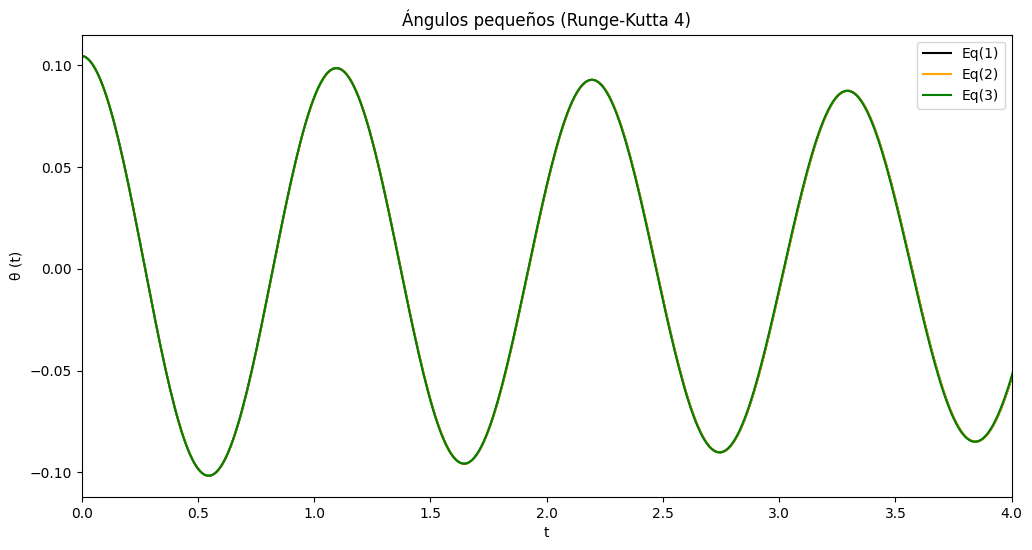

In [ ]:
#Conversión de listas a arreglos para poderlos graficar
aPeque_e1_RK = np.asarray(aPeque_e1_RK)
aPeque_e2_RK = np.asarray(aPeque_e2_RK)
aPeque_e3_RK = np.asarray(aPeque_e3_RK)

#Fragmento de código que gráfica la solución de las 3 ecuaciones para ángulos pequeños, usando el método de Runge-Kutta(4); además de dar formato a la gráfica
plt.figure(figsize=(12,6))
plt.title("Ángulos pequeños (Runge-Kutta 4)")
plt.xlim(0,4)
plt.xlabel("t")
plt.ylabel("θ (t)")
plt.plot(aPeque_e1_RK[:,0],aPeque_e1_RK[:,1],'-', color= 'black',label="Eq(1)")
plt.plot(aPeque_e2_RK[:,0],aPeque_e2_RK[:,1],'-', color= 'orange',label="Eq(2)")
plt.plot(aPeque_e3_RK[:,0],aPeque_e3_RK[:,1],'-', color= 'green',label="Eq(3)")
plt.legend()

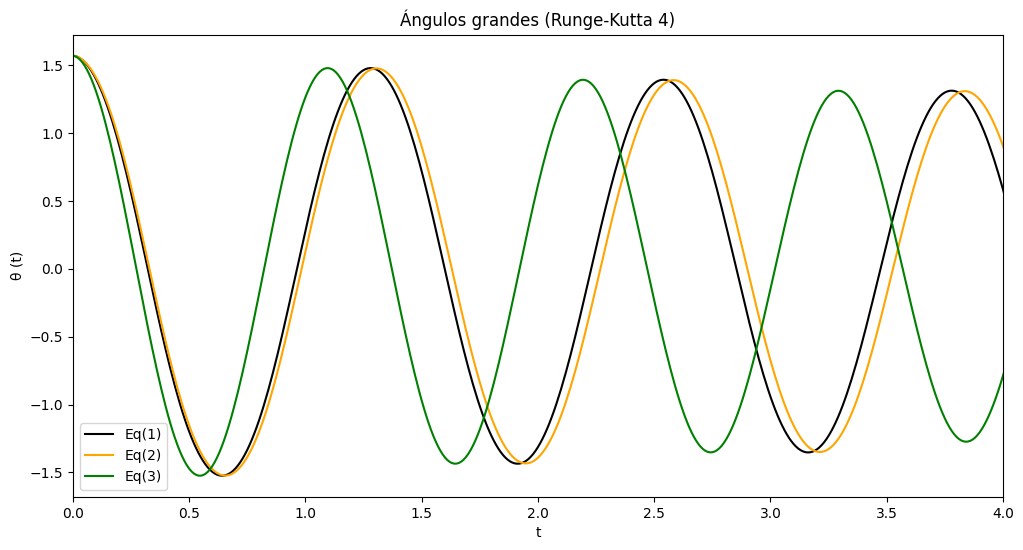

In [ ]:
#Conversión de listas a arreglos para poderlos graficar
aGrande_e1_RK = np.asarray(aGrande_e1_RK)
aGrande_e2_RK = np.asarray(aGrande_e2_RK)
aGrande_e3_RK = np.asarray(aGrande_e3_RK)

#Fragmento de código que gráfica la solución de las 3 ecuaciones para ángulos grandes, usando el método de Runge_Kutta(4); además de dar formato a la gráfica
plt.figure(figsize=(12,6))
plt.title("Ángulos grandes (Runge-Kutta 4)")
plt.xlim(0,4)
plt.xlabel("t")
plt.ylabel("θ (t)")
plt.plot(aGrande_e1_RK[:,0], aGrande_e1_RK[:,1], '-', color= 'black',label="Eq(1)")
plt.plot(aGrande_e2_RK[:,0], aGrande_e2_RK[:,1], '-', color= 'orange',label="Eq(2)")
plt.plot(aGrande_e3_RK[:,0], aGrande_e3_RK[:,1], '-', color= 'green',label="Eq(3)")
plt.legend()

#Referencias

Análisis Numérico, Richard Burden, 10ma edición, capítulo 5, págs (193-268)

Métodos numéricos, steve C. Chapra, 7ma edición, capítulo 25, págs(552-586)